In [1]:
from google.cloud import aiplatform
from google.cloud.aiplatform.gapic.schema import predict
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value
from google.oauth2 import service_account
from typing import Dict, List, Union

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Finalproject/heart.csv')
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,HeartDisease
0,40,ATA,140,289,Normal,172,N,0
1,49,NAP,160,180,Normal,156,N,1
2,37,ATA,130,283,ST,98,N,0
3,48,ASY,138,214,Normal,108,Y,1
4,54,NAP,150,195,Normal,122,N,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             1050 non-null   int64 
 1   ChestPainType   1050 non-null   object
 2   RestingBP       1050 non-null   int64 
 3   Cholesterol     1050 non-null   int64 
 4   RestingECG      1050 non-null   object
 5   MaxHR           1050 non-null   int64 
 6   ExerciseAngina  1050 non-null   object
 7   HeartDisease    1050 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 65.8+ KB


In [4]:
df.shape

(1050, 8)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,HeartDisease
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,53.679048,132.325714,204.618095,138.081905,0.544762
std,9.405738,18.151954,105.618681,25.619176,0.498230
min,28.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,120.000000,180.250000,120.000000,0.000000
50%,54.000000,130.000000,224.500000,140.000000,1.000000
75%,60.000000,140.000000,267.750000,157.750000,1.000000
max,77.000000,200.000000,603.000000,202.000000,1.000000


In [6]:
print(df.columns)

Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'HeartDisease'],
      dtype='object')


In [7]:
key_path = './comp840-project1-bd32a0b12175.json'
credentials = service_account.Credentials.from_service_account_file(key_path)

In [8]:
def predict_custom_trained_model_sample(
    project: str,
    endpoint_id: str,
    instances: Union[Dict, List[Dict]],
    location: str = "us-central1",
    api_endpoint: str = "us-central1-aiplatform.googleapis.com",
):
    """
    `instances` can be either single instance of type dict or a list
    of instances.
    """
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options, credentials=credentials)
    # The format of each instance should conform to the deployed model's prediction input schema.
    instances = instances if type(instances) == list else [instances]
    instances = [
        json_format.ParseDict(instance_dict, Value()) for instance_dict in instances
    ]
    print(instances)
    parameters_dict = {}
    parameters = json_format.ParseDict(parameters_dict, Value())
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    response = client.predict(
        endpoint=endpoint, instances=instances
    )
    print("response")
    print(" deployed_model_id:", response.deployed_model_id)
    # The predictions are a google.protobuf.Value representation of the model's predictions.
    predictions = response.predictions
    #print(" prediction:", predictions)
    for prediction in predictions:
        print(" prediction:", dict(prediction))

In [9]:
predict_custom_trained_model_sample(
    project="678033216167",
    endpoint_id="3431932032056295424",
    location="us-central1",
    instances=[{'Age':'40','ChestPainType':'ATA','RestingBP':'120','Cholesterol':'249','RestingECG':'Normal','MaxHR':'125','ExerciseAngina':'N'},
               {'Age':'26','ChestPainType':'NAP','RestingBP':'180','Cholesterol':'211','RestingECG':'ST','MaxHR':'108','ExerciseAngina':'Y'},
               {'Age':'32','ChestPainType':'ASY','RestingBP':'100','Cholesterol':'130','RestingECG':'Normal','MaxHR':'147','ExerciseAngina':'N'}
              ]
)

[struct_value {
  fields {
    key: "Age"
    value {
      string_value: "40"
    }
  }
  fields {
    key: "ChestPainType"
    value {
      string_value: "ATA"
    }
  }
  fields {
    key: "Cholesterol"
    value {
      string_value: "249"
    }
  }
  fields {
    key: "ExerciseAngina"
    value {
      string_value: "N"
    }
  }
  fields {
    key: "MaxHR"
    value {
      string_value: "125"
    }
  }
  fields {
    key: "RestingBP"
    value {
      string_value: "120"
    }
  }
  fields {
    key: "RestingECG"
    value {
      string_value: "Normal"
    }
  }
}
, struct_value {
  fields {
    key: "Age"
    value {
      string_value: "26"
    }
  }
  fields {
    key: "ChestPainType"
    value {
      string_value: "NAP"
    }
  }
  fields {
    key: "Cholesterol"
    value {
      string_value: "211"
    }
  }
  fields {
    key: "ExerciseAngina"
    value {
      string_value: "Y"
    }
  }
  fields {
    key: "MaxHR"
    value {
      string_value: "108"
    }
  }
  fie

In [10]:
all_features = df.columns

In [11]:
# Extracting all the numerical features in dataframe into 'numerical_features_all'.

numerical_features_all = df[all_features].select_dtypes(include=np.number).columns

categorical_features_all = df[all_features].select_dtypes(include='object').columns

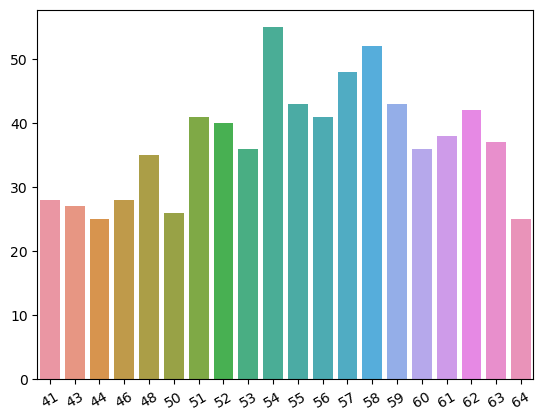

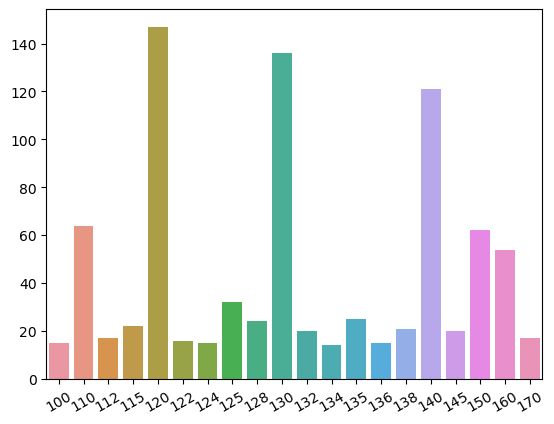

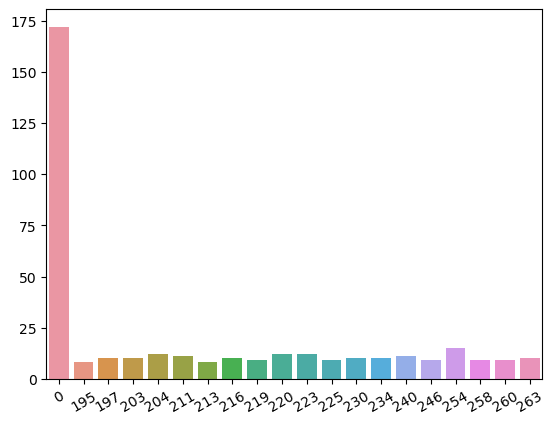

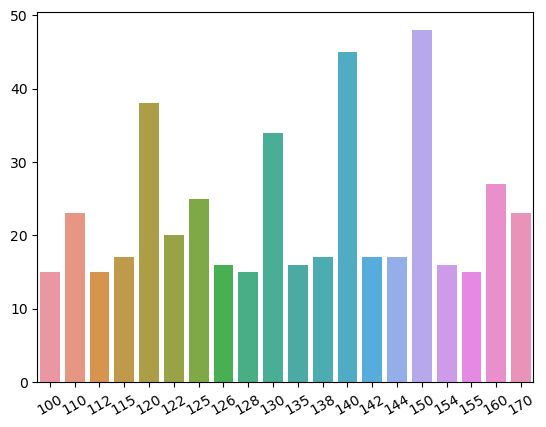

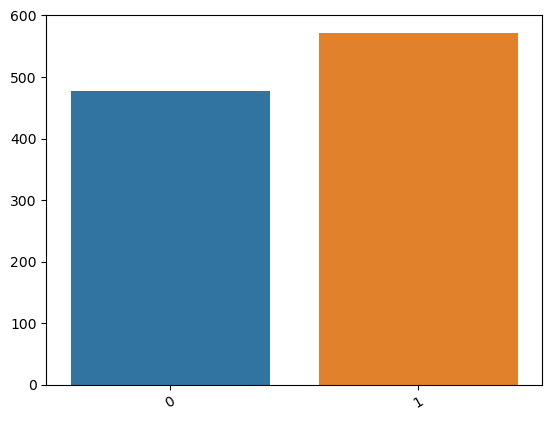

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in numerical_features_all:
    value_counts_column =  df[column].value_counts()
    if value_counts_column.shape[0] > 20:
        value_counts_column = value_counts_column.sort_values(ascending = False)
        value_counts_column = value_counts_column[:20]
    ax = sns.barplot(y=value_counts_column.values, x=value_counts_column.index)
    ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    plt.show()

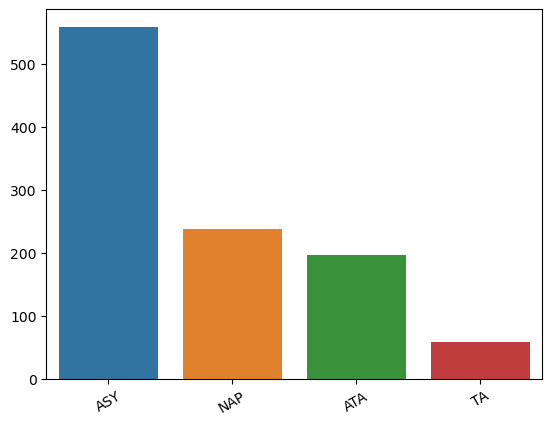

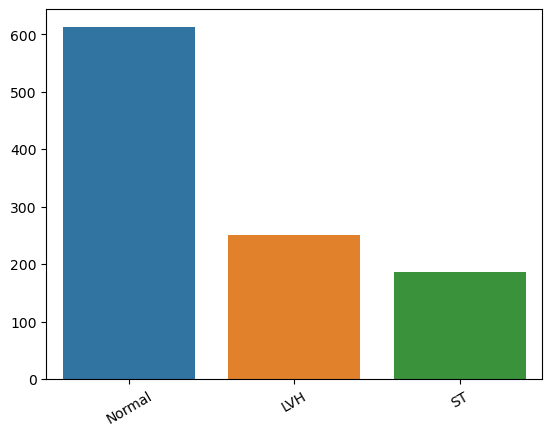

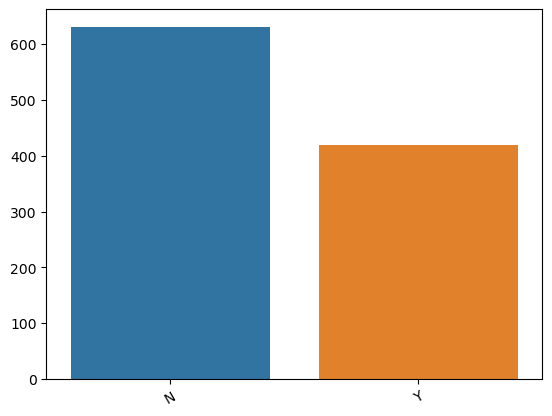

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in categorical_features_all:
    value_counts_column =  df[column].value_counts()
    if value_counts_column.shape[0] > 20:
        value_counts_column = value_counts_column.sort_values(ascending = False)
        value_counts_column = value_counts_column[:20]
    ax = sns.barplot(y=value_counts_column.values, x=value_counts_column.index)
    ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    plt.show()

Age


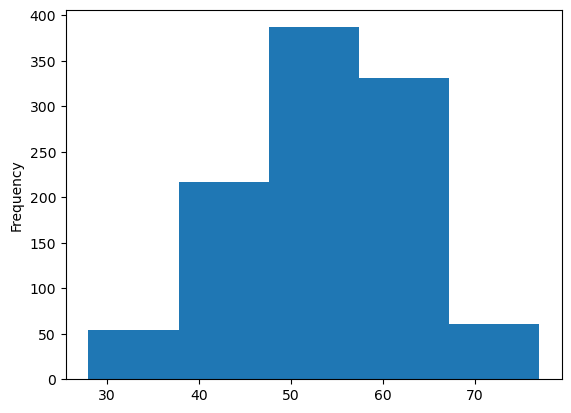

RestingBP


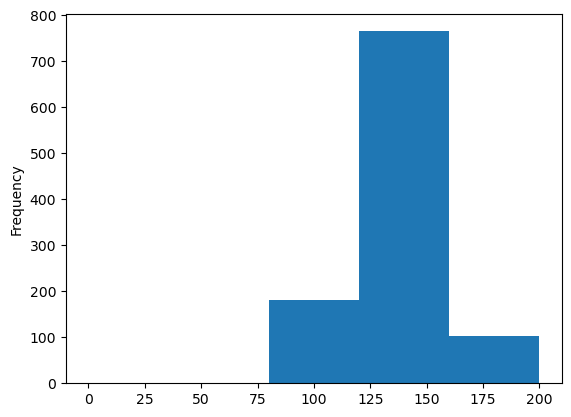

Cholesterol


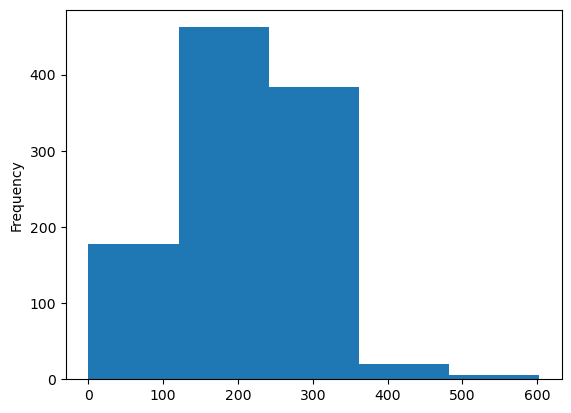

MaxHR


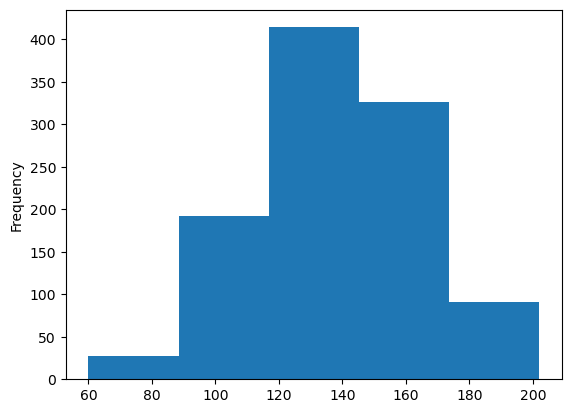

HeartDisease


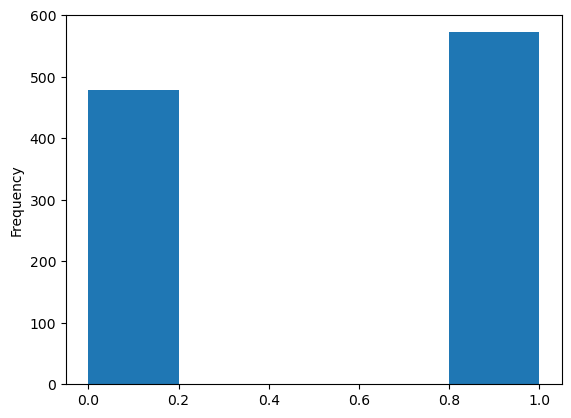

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all :
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

In [15]:
# Separate model features & model target by dropping target column from features amd adding it to model_target.

model_features = df.columns.drop('HeartDisease')
model_target = 'HeartDisease'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG',
       'MaxHR', 'ExerciseAngina'],
      dtype='object')
Model target:  HeartDisease


In [16]:
# We split our dataset into training (90%) and test (10%) subsets using sklearn's train_test_split() function.

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [17]:
# Fix the imbalance data only in the training set.

print('Training set shape:', train_data.shape)

print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))

print('Class 0 samples in the test set:', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set:', sum(test_data[model_target] == 1))

Training set shape: (840, 8)
Class 0 samples in the training set: 387
Class 1 samples in the training set: 453
Class 0 samples in the test set: 91
Class 1 samples in the test set: 119


In [18]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target] == 1]
class_1_no = train_data[train_data[model_target] == 0]

upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

train_data = pd.concat([class_1_no, upsampled_class_0_no])
train_data = shuffle(train_data)

In [19]:
print('Training set shape:', train_data.shape)

print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))
print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))

Training set shape: (774, 8)
Class 1 samples in the training set: 387
Class 0 samples in the training set: 387


In [20]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df.columns.drop('HeartDisease')
print('Categorical columns:',categorical_features_all)


Numerical columns: Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR'], dtype='object')

Categorical columns: Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG',
       'MaxHR', 'ExerciseAngina'],
      dtype='object')


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

### PIPELINE ###
################

# Pipeline desired data transformers, along with an estimator at the end
# For each step specify: a name, the actual transformer/estimator with its parameters
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', DecisionTreeClassifier(criterion='gini'))
])

In [22]:
# Get train data to train the classifier
X_train = train_data[numerical_features_all]
y_train = train_data[model_target]

# Fit the classifier to training data
# Train data going through the Pipeline it's first imputed, then scaled, and finally used to fit the estimator
classifier.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', DecisionTreeClassifier())])

In [23]:
# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', DecisionTreeClassifier())])

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) # Shown in case is needed, not a must with Decision Trees
])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')), # Shown in case is needed, no effect here as we already imputed with 'nan' strings
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
])


In [25]:
data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features_all),
    ('categorical_pre', categorical_processor, categorical_features_all)
])

In [26]:
# Pipeline desired all data transformers, along with an estimator at the end
# Later you can set/reach the parameters using the names issued - for hyperparameter tuning, for example
pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', DecisionTreeClassifier()) # n_neighbors defaults to 5
])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR'], dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG',
       'MaxHR', 'ExerciseAngina'],
      dtype='object'))])),
                ('dt', DecisionTreeClassifier())])

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

[[387   0]
 [  0 387]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       387

    accuracy                           1.00       774
   macro avg       1.00      1.00      1.00       774
weighted avg       1.00      1.00      1.00       774

Accuracy (training): 1.0
[[80 11]
 [35 84]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        91
           1       0.88      0.71      0.79       119

    accuracy                           0.78       210
   macro avg       0.79      0.79      0.78       210
weighted avg       0.80      0.78      0.78       210

Accuracy (test): 0.780952380952381


In [28]:
from sklearn.metrics import roc_curve, auc
y_pred = pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

AUC: 0.7925016160310279


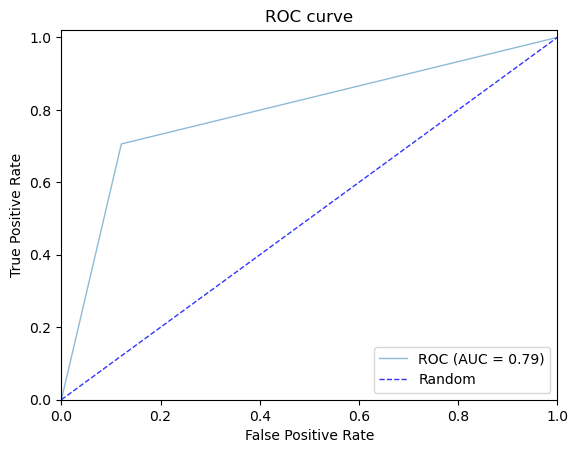

In [29]:
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1], pos_label=1)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, alpha=0.5, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', label='Random', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### PIPELINE GRID_SEARCH ###
############################

# Parameter grid for GridSearch
param_grid = {
             
             'dt__criterion' : ["entropy", "gini"],
             'dt__max_leaf_nodes' : [2,3],
             'dt__min_impurity_decrease' : [8,9]
        }

grid_search = GridSearchCV(pipeline, # Base model
                           param_grid, # Parameters to try
                           cv = 3, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors
                        )

# Fit the GridSearch to our training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('data_preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pre',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('num_scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR'], dtype='object')),
                                                                        ('categorical_pre',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strat...ost_frequent')),
                                                                                         ('cat_encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG',
       'MaxHR', 'ExerciseAngina'],
      dtype='object'))])),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['entropy', 'gini'],
                         'dt__max_leaf_nodes': [2, 3],
                         'dt__min_impurity_decrease': [8, 9]},
             verbose=1)

In [31]:
# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_
# Fit the best model to the train data once more
classifier.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR'], dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG',
       'MaxHR', 'ExerciseAngina'],
      dtype='object'))])),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=2,
                                        min_impurity_decrease=8))])

In [32]:
clf = grid_search.best_params_
print(clf)

{'dt__criterion': 'entropy', 'dt__max_leaf_nodes': 2, 'dt__min_impurity_decrease': 8}


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

[[387   0]
 [  0 387]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       387

    accuracy                           1.00       774
   macro avg       1.00      1.00      1.00       774
weighted avg       1.00      1.00      1.00       774

Accuracy (training): 1.0
[[80 11]
 [39 80]]
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        91
           1       0.88      0.67      0.76       119

    accuracy                           0.76       210
   macro avg       0.78      0.78      0.76       210
weighted avg       0.79      0.76      0.76       210

Accuracy (test): 0.7619047619047619


In [34]:
from sklearn.metrics import roc_curve, auc
y_pred = pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

AUC: 0.7756948933419522


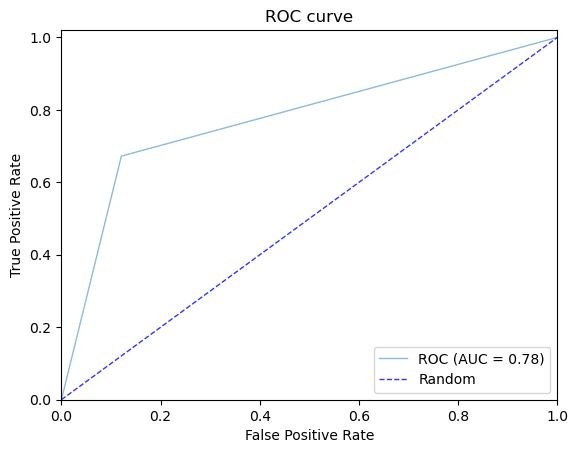

In [35]:
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1], pos_label=1)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, alpha=0.5, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', label='Random', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
import numpy as np
import pandas as pd

label = {0: 'negative', 1: 'positive'}
cat_features = ['ChestPainType', 'RestingECG', 'ExerciseAngina']

# Define a function to encode the categorical features
def encode_cat_features(data):
    encoder = pd.get_dummies(data, columns=cat_features, drop_first=True)
    # Make sure all columns are included
    for col in cat_features:
        if col not in encoder.columns:
            encoder[col] = 0
    # Reorder columns to match the model input
    encoder = encoder[['Age', 'ChestPainType','RestingBP', 'Cholesterol', 'RestingECG', 'MaxHR','ExerciseAngina']]
    return encoder

# Define the example as a list of values
example = [49, 'NAP', 160, 180, 'Normal', 156, 'N']

# Convert the example to a Pandas DataFrame and encode the categorical features
example_df = pd.DataFrame([example], columns=['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG', 'MaxHR', 'ExerciseAngina'])
example_encoded = encode_cat_features(example_df)

# Make the prediction using the pipeline object
prediction = pipeline.predict(example_encoded)[0]
print('Prediction:', label[prediction])


Prediction: negative


In [37]:
import pickle

with open('model.pkl', 'wb') as model_file:
  pickle.dump(pipeline, model_file)

In [38]:
saved_model_pipeline = pickle.load(open('model.pkl', "rb" ))

In [39]:
# Fit the pipeline 
saved_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR'], dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG',
       'MaxHR', 'ExerciseAngina'],
      dtype='object'))])),
                ('dt', DecisionTreeClassifier())])

In [40]:
# Evaluate the pipeline on the test set
from sklearn.metrics import classification_report
y_predict = pipeline.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        91
           1       0.88      0.67      0.76       119

    accuracy                           0.76       210
   macro avg       0.78      0.78      0.76       210
weighted avg       0.79      0.76      0.76       210



In [41]:
# Make the prediction using the DataFrame
print('Prediction:', label[saved_model_pipeline.predict(example_encoded)[0]])

Prediction: negative


In [42]:
def predict_custom_trained_model_sample(
    project: str,
    endpoint_id: str,
    instances: Union[Dict, List[Dict]],
    location: str = "us-central1",
    api_endpoint: str = "us-central1-aiplatform.googleapis.com",
):
    """
    instances can be either single instance of type dict or a list
    of instances.
    """
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options, credentials=credentials)
    # The format of each instance should conform to the deployed model's prediction input schema.
    instances = instances if type(instances) == list else [instances]
    instances = [
        json_format.ParseDict(instance_dict, Value()) for instance_dict in instances
    ]
    print(instances)
    parameters_dict = {}
    parameters = json_format.ParseDict(parameters_dict, Value())
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    response = client.predict(
        endpoint=endpoint, instances=instances
    )
    print("response")
    print(" deployed_model_id:", response.deployed_model_id)
    # The predictions are a google.protobuf.Value representation of the model's predictions.
    predictions = response.predictions
    #print(" prediction:", predictions)
    for prediction in predictions:
        if isinstance(prediction, dict):
            print("prediction:",  dict(prediction))
        else:
            print("prediction:", prediction)

In [43]:
predict_custom_trained_model_sample(
    project="678033216167",
    endpoint_id="2866941385053831168",
    location="us-central1",
    instances=[[49, 1, 160, 180, 0, 156, 0]]
)

[list_value {
  values {
    number_value: 49.0
  }
  values {
    number_value: 1.0
  }
  values {
    number_value: 160.0
  }
  values {
    number_value: 180.0
  }
  values {
    number_value: 0.0
  }
  values {
    number_value: 156.0
  }
  values {
    number_value: 0.0
  }
}
]
response
 deployed_model_id: 1629496023573331968
prediction: 0.0
